# Data and information quality project

### Project description: DQ problem is Feature Dependency, ML task is Classification

Given a dataset, inject more and more features with different type (linear,nonlinear,combination of features) and magnitude(low,high,negative) of correlation.

Inspect the changes in performance of ML models

### Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from A_data_collection import make_dataset_for_classification
from D_data_analysis import classification
from E_plot_results import plot
#from generate_correlated_features import inject_one_correlated_feature
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### List of Classification algorithms

In [90]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]

#Seed is set in order to assure reproducibility of experiments
SEED = 2023

### Utility functions

In [91]:
def data_exploration(X_passed,y):
    # Convert the array to a DataFrame for better visualization (optional)
    number_of_columns= X_passed.shape[1]
    columns=list()
    for i in range(0,number_of_columns):
        columns.append(f"Feature {i}")
    df = pd.DataFrame(X_passed, columns=columns)

    # Display basic information about the structure
    print("Structure Information:")
    print(df.info())

    # Display the first few rows of the structure
    print("\nFirst Few Rows of the Structure:")
    print(df.head())

    # Summary statistics of the structure
    print("\nSummary Statistics:")
    print(df.describe())


    # Visualize the distribution of each feature using histograms
    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of Features")
    plt.show()

    # Visualize the correlation matrix using a heatmap
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

#APPLY PCA
    df['Target'] = y

    # Standardize the data
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(df.drop('Target', axis=1))

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_standardized)

    # Create a DataFrame with the principal components
    pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Concatenate the principal components with the original DataFrame and the target variable
    final_df = pd.concat([pc_df, df['Target']], axis=1)

    # Visualize the data in the reduced-dimensional space, colored by the target variable
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Target', data=final_df, palette='viridis', alpha=0.7)
    plt.title('PCA: Reduced-dimensional Space with Target Variable')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend(title='Target', loc='upper right', labels=['Class 0', 'Class 1'])
    plt.show()

In [92]:
def inject_one_correlated_feature(X, target_feature_index, correlation_strength):

    
    # Assuming you have a dataset X with 1000 records and 5 features
    # Replace this with your actual dataset or generate a sample dataset
    # Ensure that the correlation coefficient is within the valid range
    correlation_strength = np.clip(correlation_strength, -1, 1)

    new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2) * np.random.randn(1000)

    #new_feature = correlation_strength * X[:, target_feature_index] + np.sqrt(1 - correlation_strength**2)
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_feature.reshape(-1, 1)))


    # Print the correlation matrix to verify the correlation
    correlation_matrix = np.corrcoef(X_with_new_feature, rowvar=False)
    #print("Correlation Matrix:")
    #print(correlation_matrix)


    # Access the correlation between the original feature and the new feature
    correlation_with_target_feature = correlation_matrix[-1, target_feature_index]
    print(f"Correlation with the target feature: {correlation_with_target_feature}")


    #data_exploration(X_with_new_feature,y)

    return X_with_new_feature

In [93]:
def inject_one_non_linear_correlated_feature(number_of_experiment,X, target_feature_index):

    # Introduce a nonlinear feature with a quadratic transformation
    if number_of_experiment==7:
        new_nonlinear_feature = X[:, target_feature_index]**2 + np.random.randn(1000)
    elif number_of_experiment==8:
        new_nonlinear_feature = np.cos(X[:, target_feature_index]) + np.random.randn(1000)
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_nonlinear_feature.reshape(-1, 1)))


    # Print the correlation matrix to verify the correlation
    correlation_matrix = np.corrcoef(X_with_new_feature, rowvar=False)
    #print("Correlation Matrix:")
    #print(correlation_matrix)


    # Access the correlation between the original feature and the new feature
    correlation_with_target_feature = correlation_matrix[-1, target_feature_index]
    print(f"Correlation with the target feature: {correlation_with_target_feature}")




    return X_with_new_feature

In [94]:
def inject_combination_of_features(number_of_experiment,X,i,j):

    # Introduce a combination feature with a quadratic transformation
    if number_of_experiment==9:
        new_combination_feature = X[:,i] * X[:,j]
    
    
    # Inject the new feature into the original dataset
    X_with_new_feature = np.column_stack((X, new_combination_feature.reshape(-1, 1)))


    return X_with_new_feature

### Create dataset for most of the experiments. And some data analysis

In [95]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

Structure Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 0  1000 non-null   float64
 1   Feature 1  1000 non-null   float64
 2   Feature 2  1000 non-null   float64
 3   Feature 3  1000 non-null   float64
 4   Feature 4  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None

First Few Rows of the Structure:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
0  -3.044852   0.401225   1.876653   1.566605  -2.132950
1   1.445783   1.330753   1.140285   0.706253   2.422165
2   2.404213   1.620161  -0.710273  -3.793487   1.183956
3   1.573431  -0.558834   0.359672   0.777892   2.637753
4  -0.849001   2.114740   3.329424  -1.255837  -1.173801

Summary Statistics:
         Feature 0    Feature 1    Feature 2    Feature 3    Feature 4
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   

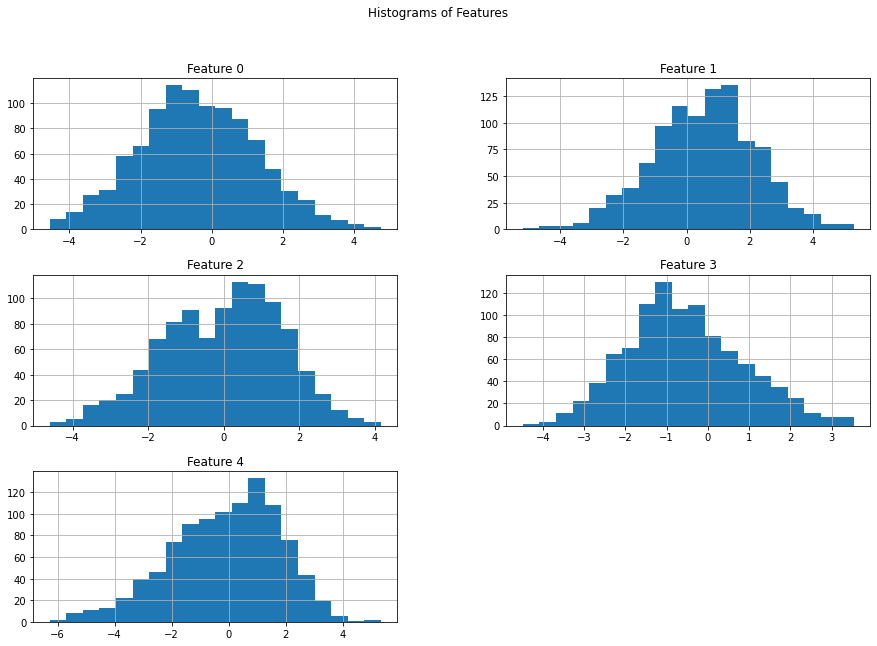

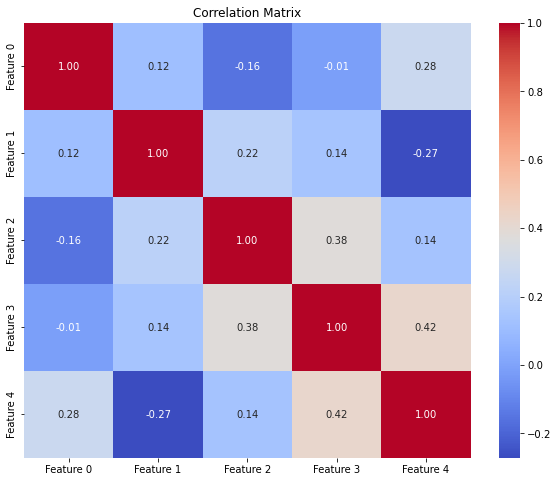

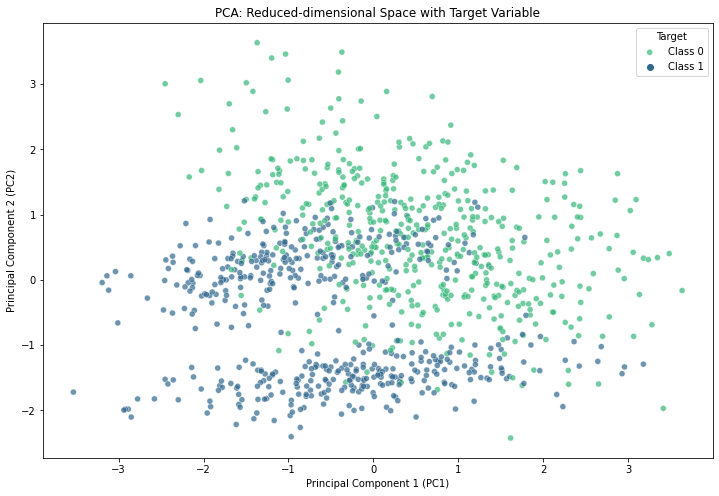

In [96]:
data_exploration(X,y)

### Experiment Function

In [122]:
def perform_experiment(number_of_experiment,X,y,CLASSIFICATION_ALGORITHMS,correlation_strength):
    #initialize the array for the results for each algorithm
    results_for_each_algorithm = []

    for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        #base model on base original dataset
        results_base_analysis = classification(X, y, algorithm, SEED)
        results_single_algorithm.append(results_base_analysis)

        #HERE WE INTRODUCE A FSM

        #EXPERIMENT 1: ONE CORRELATED FEATURE WITH INCREASING CORRELATION FROM 0 TILL 1
        #EXPERIMENT 2: ONE CORRELATED FEATURE WITH DECREASING CORRELATION FROM 0 TILL -1
        if number_of_experiment in [1,2]:
            correlation_coefficient = correlation_strength
            for i in range(0, 10): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
                #Data pollution
                
                existing_feature_index = 0  # Choose the existing feature with which you want to correlate
                if number_of_experiment==1:
                    correlation_coefficient = correlation_coefficient + 0.08 # Adjust the correlation strength

                    if i==9:
                        correlation_coefficient=1
                else:
                    correlation_coefficient = correlation_coefficient - 0.08 # Adjust the correlation strength

                    if i==9:
                        correlation_coefficient=-1
                

                X_with_new_feature = inject_one_correlated_feature(X, existing_feature_index, correlation_coefficient)
                
                
                # DATA ANALYSIS
            
                results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                results_single_algorithm.append(results_1_analysis)

        #EXPERIMENT 3: GROWING NUMBER OF FEATURES WITH LOW CORRELATION
        #EXPERIMENT 4: GROWING NUMBER OF FEATURES WITH MEDIUM CORRELATION
        #EXPERIMENT 5: GROWING NUMBER OF FEATURES WITH HIGH CORRELATION
        #EXPERIMENT 6: GROWING NUMBER OF FEATURES WITH NEGATIVE CORRELATION
        #EXPERIMENT 7: NON LINEAR QUADRATIC
        #EXPERIMENT 8: NON LINEAR COSINE
        
        #THE RESULT DEPENDS ON THE CORRELATION STRENGTH PARAMETER 
        elif number_of_experiment in [3,4,5,6,7,8]:

            X_with_new_feature = X

            for i in range(0, 15): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
               
                #Data pollution
                if number_of_experiment in [3,4,5,6]:
                    for j in range(0,X.shape[1]):
                        existing_feature_index = j
                        print(existing_feature_index)
                        X_with_new_feature = inject_one_correlated_feature(X_with_new_feature, existing_feature_index, correlation_strength)
                    
                    # DATA ANALYSIS
                    
                    results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                    results_single_algorithm.append(results_1_analysis)

                    print(X_with_new_feature.shape)

                #EXPERIMENT 7 AND 8: NON LINEAR CORRELATED FEATURE
                elif number_of_experiment in [7,8]:
                    
                    for j in range(0,X.shape[1]):
                        existing_feature_index = j
                        print(existing_feature_index)
                        X_with_new_feature = inject_one_non_linear_correlated_feature(number_of_experiment,X_with_new_feature, existing_feature_index)
                    
                    # DATA ANALYSIS
                    
                    results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                    results_single_algorithm.append(results_1_analysis)

                    print(X_with_new_feature.shape)

        #EXPERIMENT 9: COMBINATION OF FEATURES
        elif number_of_experiment==9:

            X_with_new_feature= X

            count_debug=0
            for i in range(0,5):
                for j in range(0,5):
                    if i>=j:
                        pass
                    else:
                        count_debug+=1
                        X_with_new_feature = inject_combination_of_features(number_of_experiment,X_with_new_feature,i,j)
                        results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                        results_single_algorithm.append(results_1_analysis)

                        print(X_with_new_feature.shape)

            print('DEBUG',count_debug)

        elif number_of_experiment==10:
            
            results_single_algorithm = []

            correlation_coefficient = correlation_strength
            
            for i in range(0, 20): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
                #Data pollution
                
                
                correlation_coefficient = correlation_coefficient + 0.11 # Adjust the correlation strength

                if i==0:
                    correlation_coefficient = -1
                elif i==19:
                    correlation_coefficient = 1

                for j in range(0,X.shape[1]):
                    existing_feature_index=j
                    X_with_new_feature = inject_one_correlated_feature(X, existing_feature_index, correlation_coefficient)
                
                
                # DATA ANALYSIS
            
                results_1_analysis = classification(X_with_new_feature, y, algorithm, SEED)
                results_single_algorithm.append(results_1_analysis)
            



        results_for_each_algorithm.append(results_single_algorithm)
    

    return results_for_each_algorithm

### Experiment 1: introduce one correlated feature with an increasing correlation strength that starts with 0 till 1

Correlation is around 0.5 so not so high. Let's see how increasing the number of correlated features impacts on the results

In [125]:
results_for_each_algorithm = perform_experiment(1,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
Correlation with the target feature: 0.14487456877365867
Training for DecisionTree...
Correlation with the target feature: 0.19771613713454467
Training for DecisionTree...
Correlation with the target feature: 0.346813724410208
Training for DecisionTree...
Correlation with the target feature: 0.48958351453863996
Training for DecisionTree...
Correlation with the target feature: 0.5780472781234672
Training for DecisionTree...
Correlation with the target feature: 0.6384565316376088
Training for DecisionTree...
Correlation with the target feature: 0.7455371030094367
Training for DecisionTree...
Correlation with the target feature: 0.8196797130983737
Training for DecisionTree...
Correlation with the target feature: 0.8585140268429721
Training for DecisionTree...
Correlation with the target feature: 1.0
Training for DecisionTree...
Training for LogisticRegression...
Correlation with the target feature: 0.16921812159885527
Training for LogisticRegression...
Correla

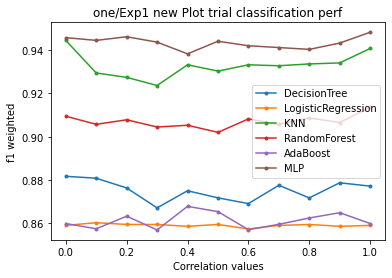

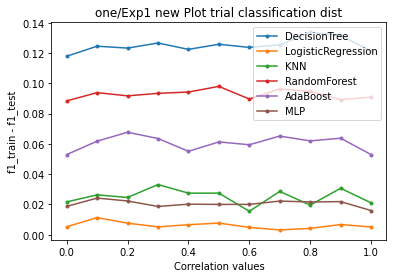

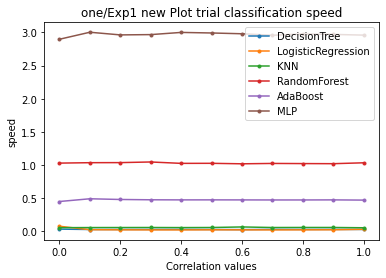

In [126]:
plot(x_axis_values=[0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], x_label="Correlation values", results=results_for_each_algorithm, title="one/Exp1 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], x_label="Correlation values", results=results_for_each_algorithm, title="one/Exp1 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], x_label="Correlation values", results=results_for_each_algorithm, title="one/Exp1 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")


### Experiment 2: introduce one correlated feature with a decresing correlation strength that starts with 0 till -1

In [102]:
results_for_each_algorithm = perform_experiment(2,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
Correlation with the target feature: -0.12259209635394851
Training for DecisionTree...
Correlation with the target feature: -0.25827021004014983
Training for DecisionTree...
Correlation with the target feature: -0.3406055877884264
Training for DecisionTree...
Correlation with the target feature: -0.5087455093429609
Training for DecisionTree...
Correlation with the target feature: -0.5974853638699478
Training for DecisionTree...
Correlation with the target feature: -0.6812397106224974
Training for DecisionTree...
Correlation with the target feature: -0.7423275061910695
Training for DecisionTree...
Correlation with the target feature: -0.810814015135216
Training for DecisionTree...
Correlation with the target feature: -0.8613125098403771
Training for DecisionTree...
Correlation with the target feature: -1.0
Training for DecisionTree...
Training for LogisticRegression...
Correlation with the target feature: -0.11565799737284219
Training for LogisticRegression.

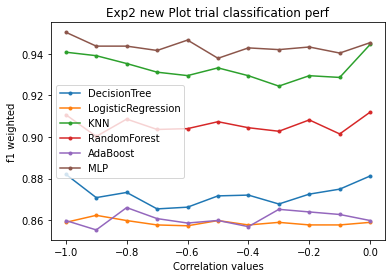

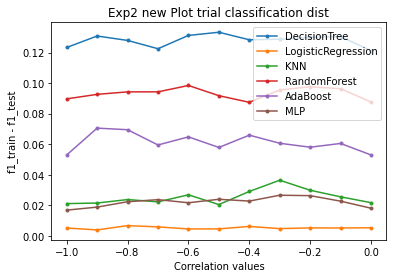

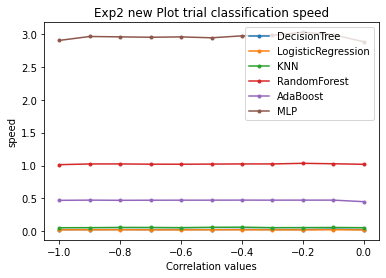

In [103]:
plot(x_axis_values=[0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1], x_label="Correlation values", results=results_for_each_algorithm, title="two/Exp2 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1], x_label="Correlation values", results=results_for_each_algorithm, title="two/Exp2 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1], x_label="Correlation values", results=results_for_each_algorithm, title="two/Exp2 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 3: growing number of features low correlation

In [104]:
results_for_each_algorithm = perform_experiment(3,X,y,CLASSIFICATION_ALGORITHMS,0.35)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.5062607626749145
1
Correlation with the target feature: 0.5372916438887273
2
Correlation with the target feature: 0.4660441914898585
3
Correlation with the target feature: 0.4184196913471594
4
Correlation with the target feature: 0.595099525658607
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.5231877748045628
1
Correlation with the target feature: 0.5161984631093705
2
Correlation with the target feature: 0.527693212215968
3
Correlation with the target feature: 0.47305204638700543
4
Correlation with the target feature: 0.5855206380723531
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.5241663738151707
1
Correlation with the target feature: 0.5044741840899829
2
Correlation with the target feature: 0.4712289169431328
3
Correlation with the target feature: 0.4866772505955838
4
Correlation with the target feature: 0.5839155686734081
Training for DecisionT

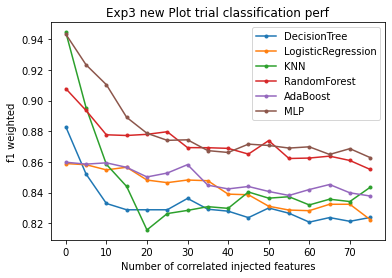

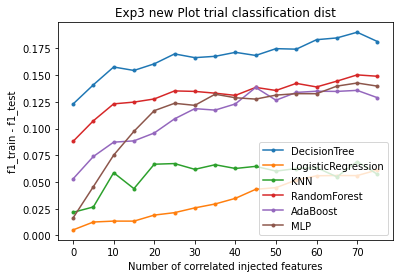

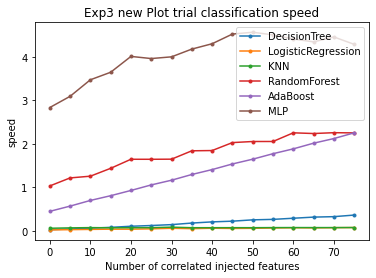

In [105]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="three/Exp3 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="three/Exp3 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="three/Exp3 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 4: growing number of feature with medium correlation

In [106]:
results_for_each_algorithm = perform_experiment(4,X,y,CLASSIFICATION_ALGORITHMS,0.5)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.7050932817668256
1
Correlation with the target feature: 0.6831568734583496
2
Correlation with the target feature: 0.6577769867775195
3
Correlation with the target feature: 0.6359695326245202
4
Correlation with the target feature: 0.7295695746859601
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.6983534381716475
1
Correlation with the target feature: 0.683105781883708
2
Correlation with the target feature: 0.6669528842040392
3
Correlation with the target feature: 0.6579417751186519
4
Correlation with the target feature: 0.7232035321282315
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.6774198341500154
1
Correlation with the target feature: 0.6856195949346492
2
Correlation with the target feature: 0.6753405804739682
3
Correlation with the target feature: 0.6604907891388705
4
Correlation with the target feature: 0.7316344725046552
Training for DecisionT

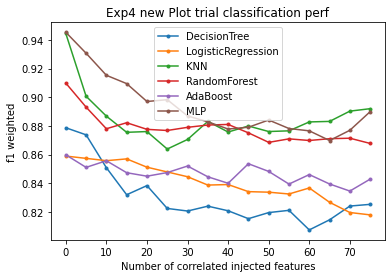

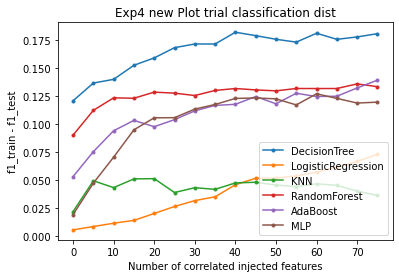

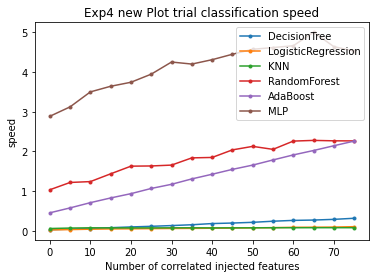

In [107]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="four/Exp4 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="four/Exp4 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="four/Exp4 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 5: growing number of feature with high correlation

In [108]:
results_for_each_algorithm = perform_experiment(5,X,y,CLASSIFICATION_ALGORITHMS,0.85)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.9358670592362466
1
Correlation with the target feature: 0.9349962521151182
2
Correlation with the target feature: 0.9264753255293743
3
Correlation with the target feature: 0.919643147821478
4
Correlation with the target feature: 0.9486838653421976
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.933413824936053
1
Correlation with the target feature: 0.9351800587283864
2
Correlation with the target feature: 0.9352839349553138
3
Correlation with the target feature: 0.9141150503188159
4
Correlation with the target feature: 0.9503157981823303
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.9392421846373731
1
Correlation with the target feature: 0.9388773442884187
2
Correlation with the target feature: 0.9249544347029799
3
Correlation with the target feature: 0.9103093504454332
4
Correlation with the target feature: 0.9498216982461571
Training for DecisionTr

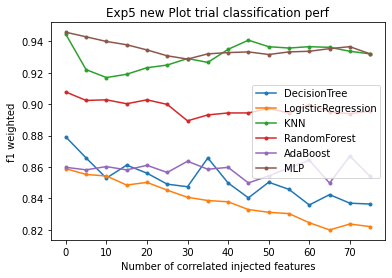

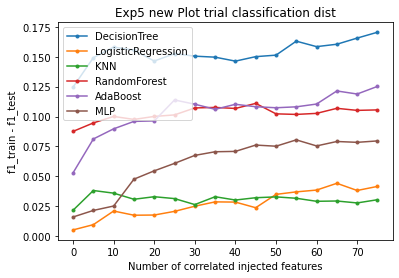

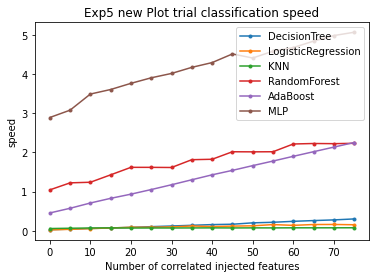

In [109]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="five/Exp5 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="five/Exp5 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="five/Exp5 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 6: growing number of feature with negative correlation

In [110]:
results_for_each_algorithm = perform_experiment(6,X,y,CLASSIFICATION_ALGORITHMS,-0.5)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: -0.6838943731926369
1
Correlation with the target feature: -0.6774636252822627
2
Correlation with the target feature: -0.6698956670391208
3
Correlation with the target feature: -0.6662126947847719
4
Correlation with the target feature: -0.7218438623290242
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: -0.6806916365615671
1
Correlation with the target feature: -0.7068506640383069
2
Correlation with the target feature: -0.665039720924046
3
Correlation with the target feature: -0.6234456772851601
4
Correlation with the target feature: -0.720860951815024
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: -0.7022659208425645
1
Correlation with the target feature: -0.7034264066016658
2
Correlation with the target feature: -0.6637007457420059
3
Correlation with the target feature: -0.6471812286840392
4
Correlation with the target feature: -0.7482310144363837
Training

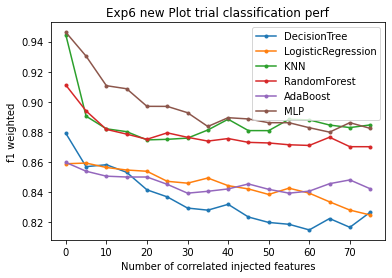

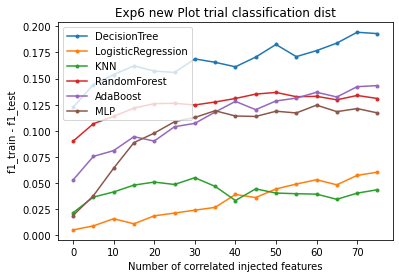

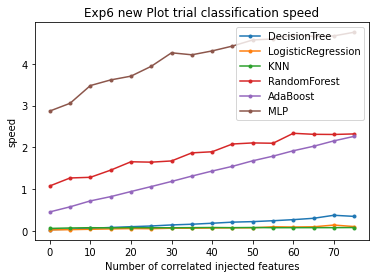

In [111]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="six/Exp6 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="six/Exp6 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="six/Exp6 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 7: inject more and more non linear correlated features (power of 2 of a feature)

In [112]:
results_for_each_algorithm = perform_experiment(7,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: -0.27772031817969395
1
Correlation with the target feature: 0.3203356359457023
2
Correlation with the target feature: -0.2036338368556642
3
Correlation with the target feature: -0.3222651107366402
4
Correlation with the target feature: -0.3678346121543941
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: -0.27315179252390287
1
Correlation with the target feature: 0.33279146958245925
2
Correlation with the target feature: -0.19527734757837745
3
Correlation with the target feature: -0.31267439403932884
4
Correlation with the target feature: -0.3653741559097687
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: -0.26040195522387805
1
Correlation with the target feature: 0.320263102970936
2
Correlation with the target feature: -0.2075043052171866
3
Correlation with the target feature: -0.32974298975074584
4
Correlation with the target feature: -0.37792899879997793
Tr

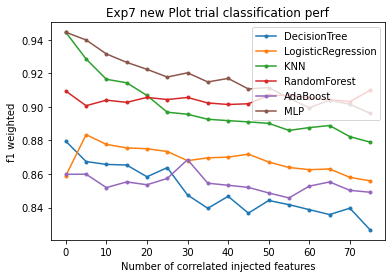

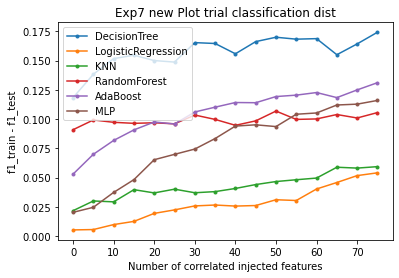

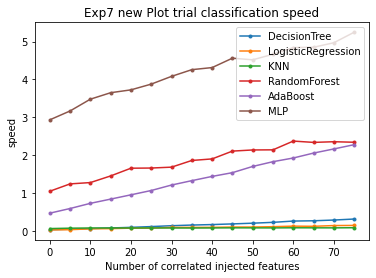

In [113]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="seven/Exp7 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="seven/Exp7 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="seven/Exp7 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 8: inject more and more non linear correlated features (cosine)

In [114]:
results_for_each_algorithm = perform_experiment(8,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
0
Correlation with the target feature: 0.1503892397729922
1
Correlation with the target feature: -0.1862126763441614
2
Correlation with the target feature: 0.06309303177214245
3
Correlation with the target feature: 0.1682281177669967
4
Correlation with the target feature: 0.04598872665934167
Training for DecisionTree...
(1000, 10)
0
Correlation with the target feature: 0.1233187332714597
1
Correlation with the target feature: -0.1742450059823563
2
Correlation with the target feature: 0.057491866945609094
3
Correlation with the target feature: 0.15684259284132093
4
Correlation with the target feature: 0.0015242698592987662
Training for DecisionTree...
(1000, 15)
0
Correlation with the target feature: 0.1365810309253361
1
Correlation with the target feature: -0.15253014641678297
2
Correlation with the target feature: 0.05633541100150136
3
Correlation with the target feature: 0.16020182309077505
4
Correlation with the target feature: 0.03150808692860015
Traini

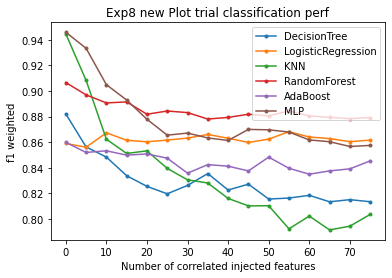

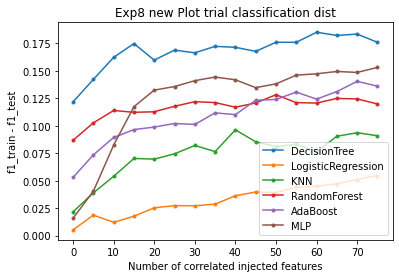

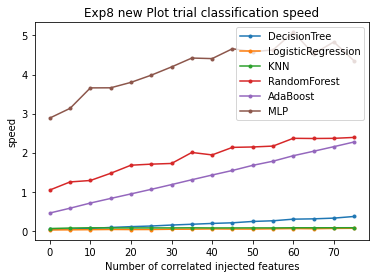

In [115]:
result_array = np.arange(0, 16 * 5, 5)
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="eight/Exp8 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="eight/Exp8 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of correlated injected features", results=results_for_each_algorithm, title="eight/Exp8 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 9: Introducing new features as a linear combination of existing features

In [116]:
results_for_each_algorithm = perform_experiment(9,X,y,CLASSIFICATION_ALGORITHMS,0)

print(results_for_each_algorithm)

Training for DecisionTree...
Training for DecisionTree...
(1000, 6)
Training for DecisionTree...
(1000, 7)
Training for DecisionTree...
(1000, 8)
Training for DecisionTree...
(1000, 9)
Training for DecisionTree...
(1000, 10)
Training for DecisionTree...
(1000, 11)
Training for DecisionTree...
(1000, 12)
Training for DecisionTree...
(1000, 13)
Training for DecisionTree...
(1000, 14)
Training for DecisionTree...
(1000, 15)
DEBUG 10
Training for LogisticRegression...
Training for LogisticRegression...
(1000, 6)
Training for LogisticRegression...
(1000, 7)
Training for LogisticRegression...
(1000, 8)
Training for LogisticRegression...
(1000, 9)
Training for LogisticRegression...
(1000, 10)
Training for LogisticRegression...
(1000, 11)
Training for LogisticRegression...
(1000, 12)
Training for LogisticRegression...
(1000, 13)
Training for LogisticRegression...
(1000, 14)
Training for LogisticRegression...
(1000, 15)
DEBUG 10
Training for KNN...
Training for KNN...
(1000, 6)
Training for KNN

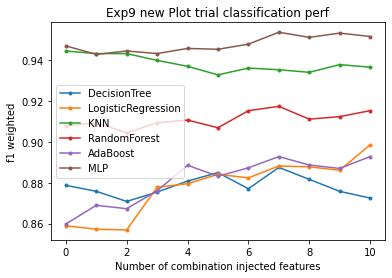

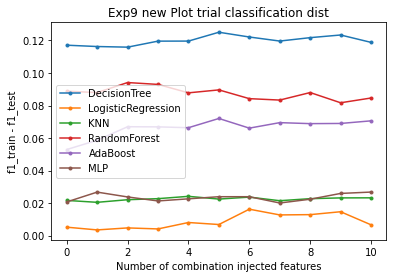

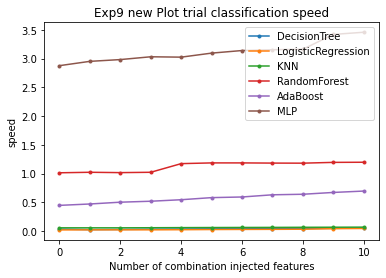

In [117]:
result_array = np.arange(0,11)
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="nine/Exp9 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="nine/Exp9 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=result_array, x_label="Number of combination injected features", results=results_for_each_algorithm, title="nine/Exp9 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

### Experiment 10: introducing 5 correlated features going from -1 to 1 correlation.

In [123]:
results_for_each_algorithm = perform_experiment(10,X,y,CLASSIFICATION_ALGORITHMS,-1)

print(results_for_each_algorithm)

Training for DecisionTree...
Correlation with the target feature: -1.0
Correlation with the target feature: -1.0
Correlation with the target feature: -1.0
Correlation with the target feature: -1.0
Correlation with the target feature: -0.9999999999999999
Training for DecisionTree...
Correlation with the target feature: -0.9493245287099387
Correlation with the target feature: -0.9543550107186188
Correlation with the target feature: -0.9512838900889865
Correlation with the target feature: -0.9400947448021435
Correlation with the target feature: -0.9638344479643237
Training for DecisionTree...
Correlation with the target feature: -0.9071445400418833
Correlation with the target feature: -0.9012496312723853
Correlation with the target feature: -0.8857385179951589
Correlation with the target feature: -0.8692801804171778
Correlation with the target feature: -0.9249734320326797
Training for DecisionTree...
Correlation with the target feature: -0.827943231116199
Correlation with the target featu

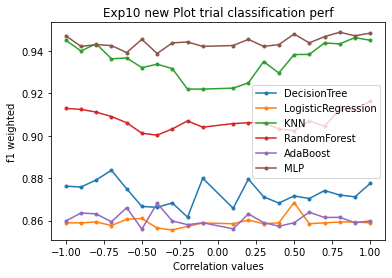

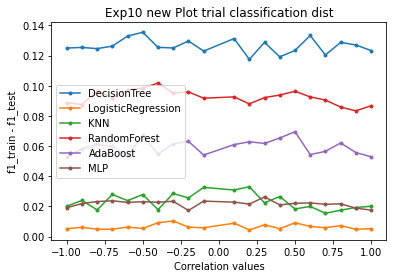

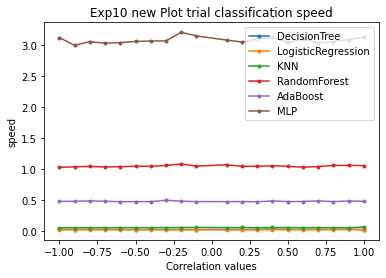

In [124]:
plot(x_axis_values=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], x_label="Correlation values", results=results_for_each_algorithm, title="ten/Exp10 new Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], x_label="Correlation values", results=results_for_each_algorithm, title="ten/Exp10 new Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], x_label="Correlation values", results=results_for_each_algorithm, title="ten/Exp10 new Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")